In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

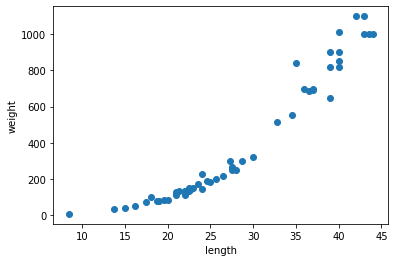

In [4]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [15]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [18]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

#kNN 회귀 모델 훈랸
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [19]:
knr.score(test_input, test_target)

0.9928094061010639

In [20]:
from sklearn.metrics import mean_absolute_error

#테스트 셋에 대한 예측 만들기
test_prediction = knr.predict(test_input)

#테스트 셋에 대한 평균 절대값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

### 훈련 셋에 대해 점수 측정

In [21]:
knr.score(train_input, train_target)

0.9698823289099255

## 과소적합 해결을 위해 k를 작게함

In [22]:
#이웃의 개수를 3개로 설정
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.974645996398761

In [24]:
knr.score(train_input, train_target)

0.9804899950518966